# Fourier Transform

The [Fourier transform](https://en.wikipedia.org/wiki/Fourier_transform) transforms any periodic function in time domain into an equivalent series in frequency domain.

$$f(t) = \sum_{n=1}^{\infty} a_0 + a_n sin(n \omega) + b_n cos(n \omega)$$

Given a set of finite time domain samples, the Fourier transform can be computed using the [Discrete Fourier Transform (DFT)](https://en.wikipedia.org/wiki/Discrete_Fourier_transform) or the [Fast Fourier Transform (FFT)](https://en.wikipedia.org/wiki/Fast_Fourier_transform). The DFT and FFT differ only in computational complexity. The complexity of the DFT is $O(N^2)$, compared to $O(N log N)$ for the FFT, where N is the sample size.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
import scipy.signal
import pandas as pd

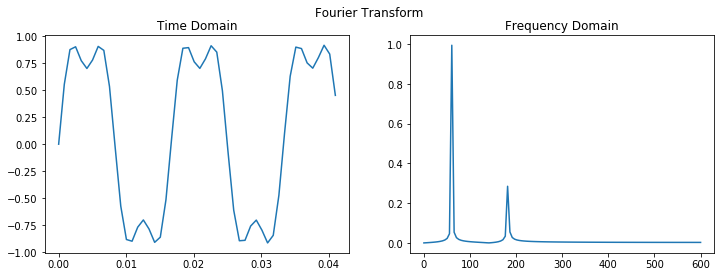

,Frequency,Magnitude
0,60.0,0.99461
1,180.0,0.28499


In [2]:
# Number of samples
N = 240
# Sample rate in Hz
fs = 1200
# Total time in seconds
T = N / fs
t = np.linspace(0.0, T, N)
f = 60
w = 2 * np.pi * f
y = np.sin(w * t) + 0.3*np.sin(3 * w * t)

yf = scipy.fftpack.fft(y)
mag = 2.0/N * np.abs(yf[:N//2])
xf = np.linspace(0.0, fs/2.0, N//2)

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(t[:50], y[:50])
plt.title("Time Domain")
plt.subplot(122)
plt.title("Frequency Domain")
plt.plot(xf, mag)
plt.suptitle('Fourier Transform')
plt.show()

peaks = (-mag).argsort()[:2]
freqs = peaks * fs/N
d = {'Frequency': freqs, 'Magnitude': [mag[i] for i in peaks]}
df = pd.DataFrame(data=d)
df

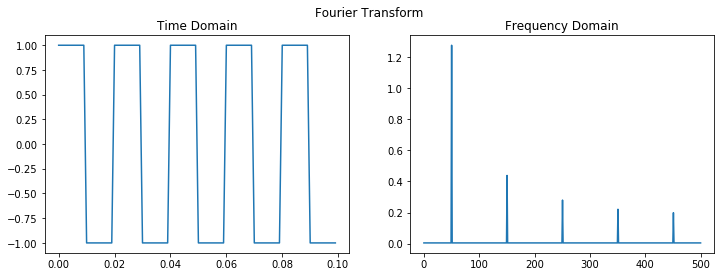

,Frequency,Magnitude
0,50.0,1.277871
1,150.0,0.438736
2,250.0,0.280029
3,350.0,0.220909


In [3]:
# Number of samples
N = 1000
# Sample rate in Hz
fs = 1000
# Total time in seconds
T = N / fs
t = np.linspace(0.0, T, N)

f = 50
w = 2 * np.pi * f
y = scipy.signal.square(w * t)
yf = scipy.fftpack.fft(y)
mag = 2.0/N * np.abs(yf[:N//2])
xf = np.linspace(0.0, fs/2.0, N//2)

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(t[:100], y[:100])
plt.title("Time Domain")
plt.subplot(122)
plt.title("Frequency Domain")
plt.plot(xf, mag)
plt.suptitle('Fourier Transform')
plt.show()

peaks = (-mag).argsort()[:4]
freqs = peaks * fs/N
d = {'Frequency': freqs, 'Magnitude': [mag[i] for i in peaks]}
df = pd.DataFrame(data=d)
df

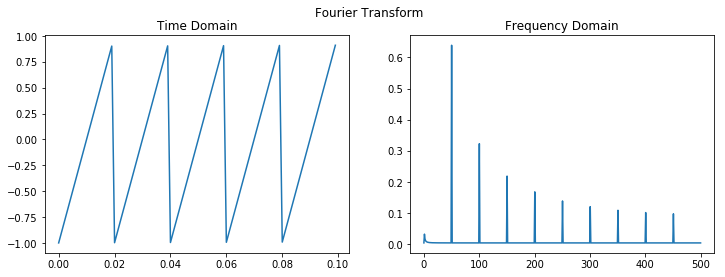

,Frequency,Magnitude
0,50.0,0.639272
1,100.0,0.322717
2,150.0,0.218702
3,200.0,0.167980
4,250.0,0.138763
5,300.0,0.120517


In [4]:
# Number of samples
N = 1000
# Sample rate in Hz
fs = 1000
# Total time in seconds
T = N / fs
t = np.linspace(0.0, T, N)

f = 50
w = 2 * np.pi * f
y = scipy.signal.sawtooth(w * t, 1)
yf = scipy.fftpack.fft(y)
mag = 2.0/N * np.abs(yf[:N//2])
xf = np.linspace(0.0, fs/2.0, N//2)

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(t[:100], y[:100])
plt.title("Time Domain")
plt.subplot(122)
plt.title("Frequency Domain")
plt.plot(xf, mag)
plt.suptitle('Fourier Transform')
plt.show()

peaks = (-mag).argsort()[:6]
freqs = peaks * fs/N
d = {'Frequency': freqs, 'Magnitude': [mag[i] for i in peaks]}
df = pd.DataFrame(data=d)
df